In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\HDFC_Internship\DATA\Fraud_Data_Final.csv")

In [3]:
df.shape

(73385, 9)

In [4]:
df.size

660465

In [5]:
df.tail()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
73380,38095,903947,2018-07-04 7:55:16,2015,Retail,63.03,8150116,94,0
73381,38096,243562,2018-04-26 10:24:24,2015,Retail,45.23,2197464,25,0
73382,38098,773468,2018-06-20 13:49:15,2015,Retail,31.59,6961755,80,0
73383,38100,1177522,2018-08-01 16:44:45,2016,Retail,27.61,10601085,122,0
73384,38101,948456,2018-07-08 17:53:44,2016,Retail,11.41,8531624,98,0


In [6]:
df.head()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,0,1653444,2018-09-20 11:49:41,0,Hotels,88.11,14903381,172,0
1,1,1657926,2018-09-20 20:21:57,0,Grocery,78.25,14934117,172,0
2,2,1174679,2018-08-01 12:11:36,0,Airways,62.28,10584696,122,0
3,3,1175894,2018-08-01 13:58:40,0,Airways,80.16,10591120,122,0
4,4,758479,2018-06-19 4:18:11,0,Insulation,90.07,6841091,79,0


In [7]:
df.describe(include='all')

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
count,73385.000000,7.338500e+04,73385,73385.000000,73385,73385.000000,7.338500e+04,73385.000000,73385.000000
unique,NaN,NaN,70904,NaN,10,NaN,NaN,NaN,NaN
top,NaN,NaN,2018-04-05 13:03:35,NaN,Insulation,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,NaN,9512,NaN,NaN,NaN,NaN
mean,41048.878204,8.233976e+05,NaN,2173.954514,NaN,55.177761,7.419868e+06,85.383307,0.008939
std,26492.483939,5.479239e+05,NaN,1409.347516,NaN,43.472514,4.939476e+06,57.169018,0.094124
min,0.000000,6.295000e+03,NaN,0.000000,NaN,0.000000,5.153000e+04,0.000000,0.000000
25%,18346.000000,4.632880e+05,NaN,967.000000,NaN,21.790000,4.177458e+06,48.000000,0.000000
50%,36692.000000,7.594650e+05,NaN,1941.000000,NaN,46.030000,6.850855e+06,79.000000,0.000000
75%,63533.000000,1.347494e+06,NaN,3334.000000,NaN,78.990000,1.214317e+07,140.000000,0.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73385 entries, 0 to 73384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SERIAL NUMBER                 73385 non-null  int64  
 1   TRANSACTION_ID                73385 non-null  int64  
 2   DATETIME                      73385 non-null  object 
 3   CUSTOMER_ID                   73385 non-null  int64  
 4   TYPE of TRANSACTION           73385 non-null  object 
 5   TRASCATION AMOUNT             73385 non-null  float64
 6   TIME_SECONDS                  73385 non-null  int64  
 7   DAYS_SINCE_FIRST_TRANSACTION  73385 non-null  int64  
 8   FRAUD                         73385 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.0+ MB


In [9]:
df.isnull().sum()

SERIAL NUMBER                   0
TRANSACTION_ID                  0
DATETIME                        0
CUSTOMER_ID                     0
TYPE of TRANSACTION             0
TRASCATION AMOUNT               0
TIME_SECONDS                    0
DAYS_SINCE_FIRST_TRANSACTION    0
FRAUD                           0
dtype: int64

In [10]:
df.dtypes.value_counts()

int64      6
object     2
float64    1
dtype: int64

In [11]:
df['TYPE of TRANSACTION'].value_counts().count()

10

In [12]:
df['TYPE of TRANSACTION'].value_counts()

Insulation     9512
Food           9211
Electronics    7931
Clothing       7394
Grocery        7115
Retail         7000
Footwear       6621
Airways        6584
Hotels         6086
Rental Car     5931
Name: TYPE of TRANSACTION, dtype: int64

In [13]:
df['TYPE of TRANSACTION'][df["FRAUD"] == 1].value_counts()

Food           107
Insulation      91
Electronics     77
Retail          73
Airways         66
Hotels          65
Grocery         63
Footwear        51
Rental Car      42
Clothing        21
Name: TYPE of TRANSACTION, dtype: int64

In [14]:
df['TYPE of TRANSACTION'][df["FRAUD"] == 0].value_counts()

Insulation     9421
Food           9104
Electronics    7854
Clothing       7373
Grocery        7052
Retail         6927
Footwear       6570
Airways        6518
Hotels         6021
Rental Car     5889
Name: TYPE of TRANSACTION, dtype: int64

In [15]:
df['CUSTOMER_ID'].value_counts().count()

3456

In [55]:
df['TRANSACTION_ID'].value_counts().count()

73385

In [16]:
df['CUSTOMER_ID'].value_counts()

1848    57
571     57
1157    57
98      56
1881    55
        ..
2288     1
2145     1
4917     1
2023     1
1896     1
Name: CUSTOMER_ID, Length: 3456, dtype: int64

In [17]:
df['CUSTOMER_ID'][df["FRAUD"] == 1].value_counts()

1692    5
613     5
701     5
1085    5
1743    5
       ..
1719    1
1708    1
1706    1
1693    1
1992    1
Name: CUSTOMER_ID, Length: 536, dtype: int64

In [18]:
df['CUSTOMER_ID'][df["FRAUD"] == 0].value_counts()

571     57
1848    57
1157    57
98      56
1881    55
        ..
2357     1
2288     1
2145     1
4917     1
1896     1
Name: CUSTOMER_ID, Length: 3455, dtype: int64

In [19]:
df['FRAUD'].value_counts().count()

2

In [20]:
df['FRAUD'].value_counts(normalize=True)

0    0.991061
1    0.008939
Name: FRAUD, dtype: float64

<AxesSubplot:>

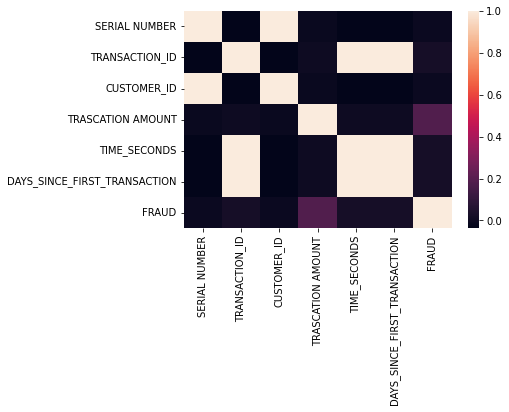

In [21]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [22]:
classes=df['FRAUD'].value_counts()
normal_share=round(classes[0]/df['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.11, 0.89)

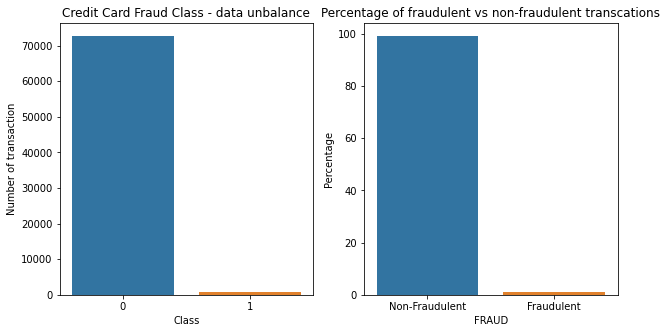

In [23]:
# bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = df["FRAUD"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'FRAUD':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x=df_fraud_percentage['FRAUD'], y=df_fraud_percentage['Percentage'])
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

In [24]:
# drop unnecessary columns
# df = df.drop("SERIAL NUMBER", axis = 1)
df = df.drop("TIME_SECONDS", axis = 1)

In [25]:
df.head()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,0,1653444,2018-09-20 11:49:41,0,Hotels,88.11,172,0
1,1,1657926,2018-09-20 20:21:57,0,Grocery,78.25,172,0
2,2,1174679,2018-08-01 12:11:36,0,Airways,62.28,122,0
3,3,1175894,2018-08-01 13:58:40,0,Airways,80.16,122,0
4,4,758479,2018-06-19 4:18:11,0,Insulation,90.07,79,0


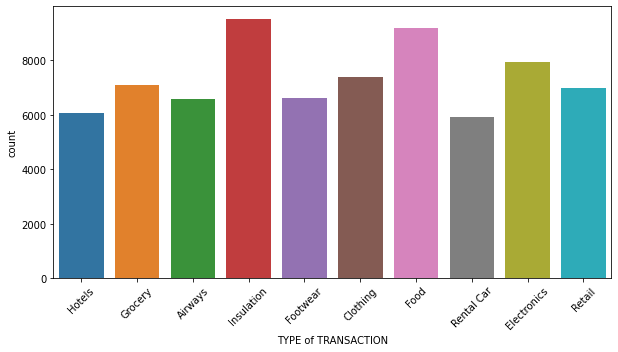

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x=df["TYPE of TRANSACTION"], data=df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

<AxesSubplot:xlabel='TYPE of TRANSACTION', ylabel='count'>

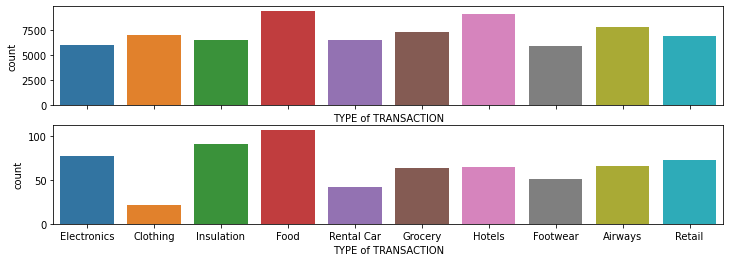

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

sns.countplot(x=df["TYPE of TRANSACTION"][df["FRAUD"] == 0], data=df, ax=ax1)


sns.countplot(x=df["TYPE of TRANSACTION"][df["FRAUD"] == 1], data=df, ax=ax2)


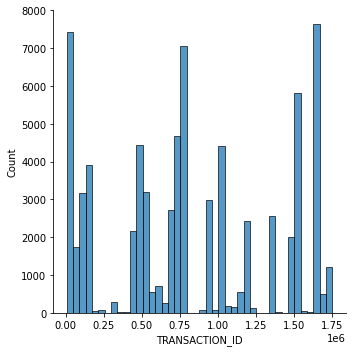

In [28]:
sns.displot(x = df['TRANSACTION_ID'])
plt.show()

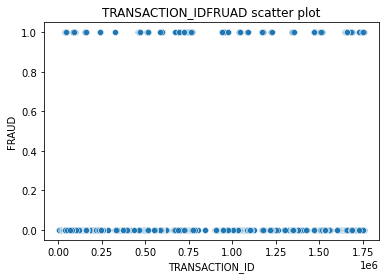

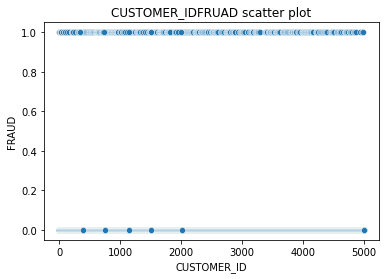

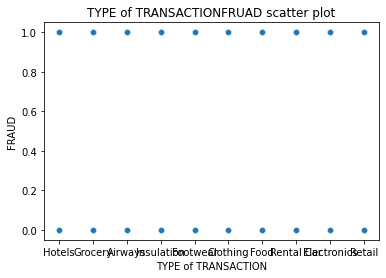

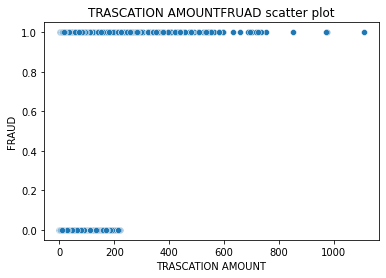

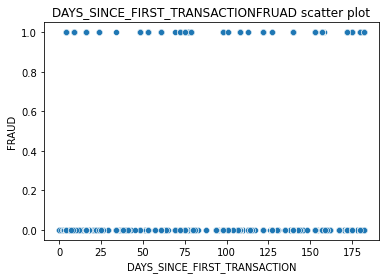

In [29]:
features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    sns.scatterplot(x = df[f], y = df["FRAUD"])
    title = f + " FRUAD scatter plot"
    plt.title(title)
    plt.show()
    

In [30]:
# sns.catplot(x='TYPE of TRANSACTION', y = " ", hue='FRAUD', data=df, kind='bar')

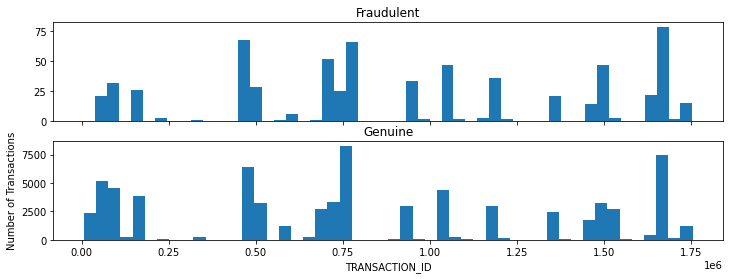

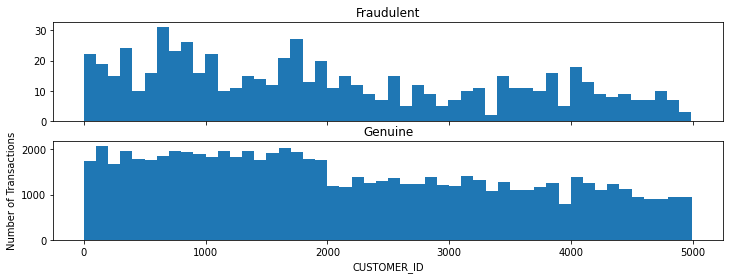

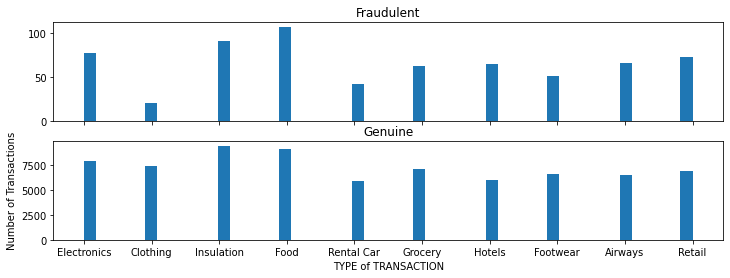

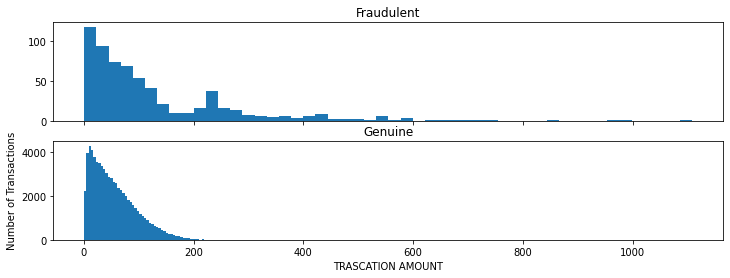

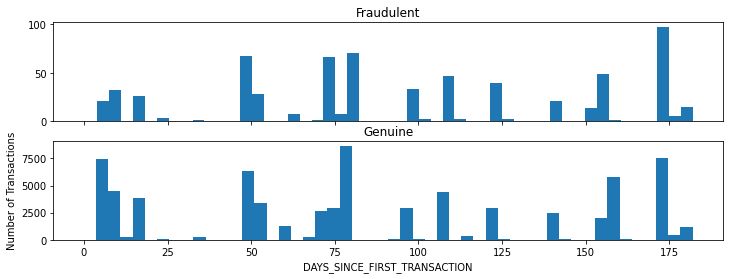

In [31]:
features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

    ax1.hist(df[f][df["FRAUD"] == 1], bins = 50)
    ax1.set_title('Fraudulent')

    ax2.hist(df[f][df["FRAUD"] == 0], bins = 50)
    ax2.set_title('Genuine')

    plt.xlabel(f)
    plt.ylabel('Number of Transactions')
    plt.show()

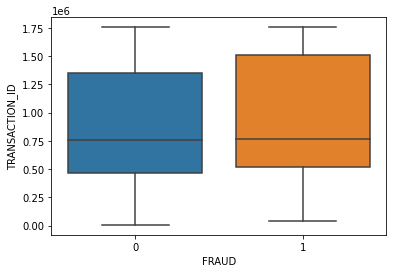

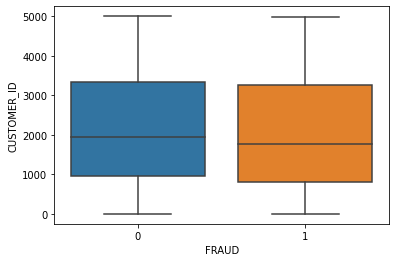

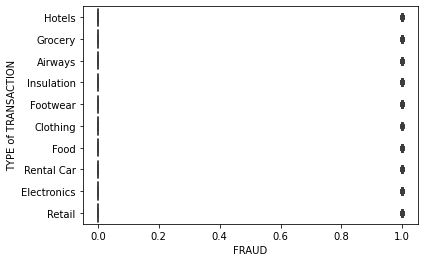

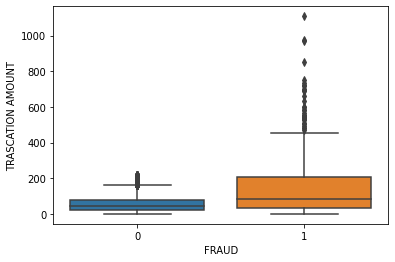

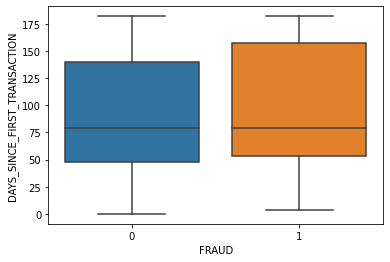

In [32]:
#Boxplot for the features, in order to visualiza the outliers.

features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']
for f in features:
    sns.boxplot(x=df['FRAUD'], y=df[f])
    plt.show()
    

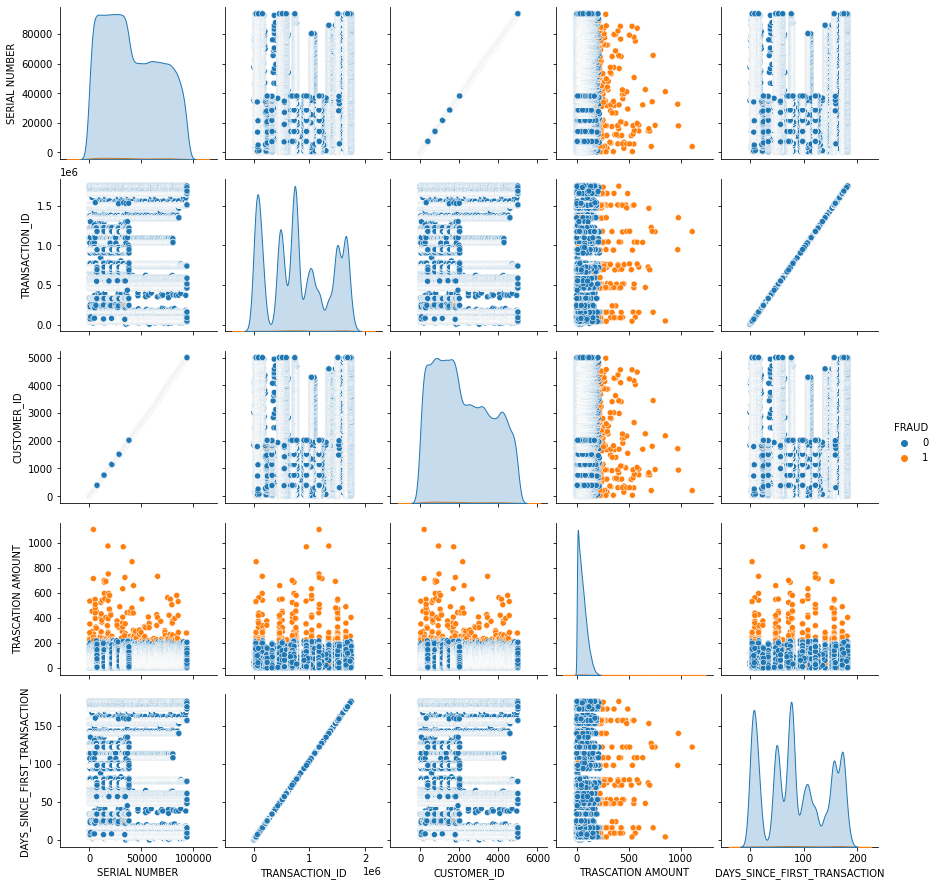

In [33]:
sns.pairplot(df,hue='FRAUD');

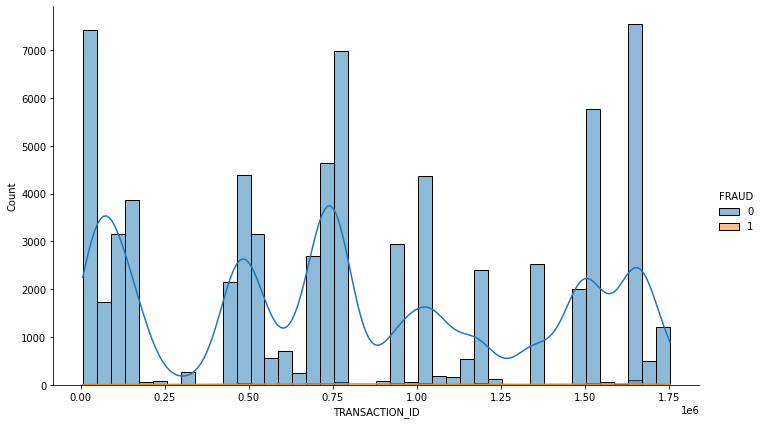

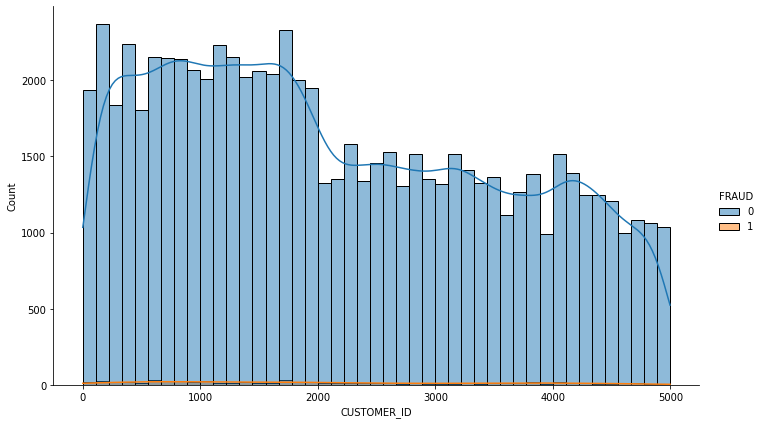

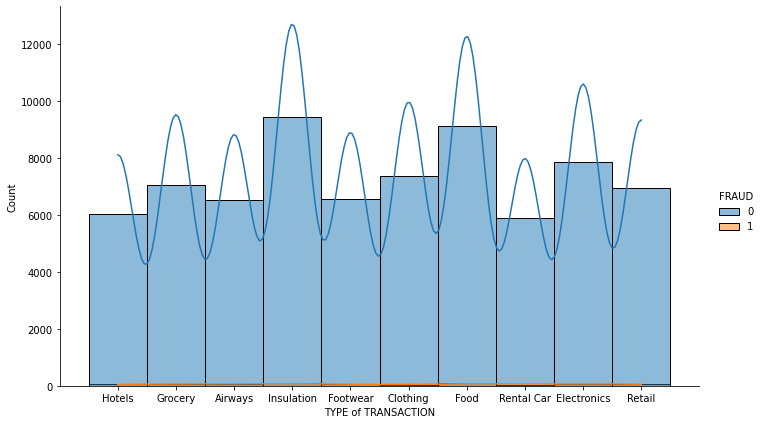

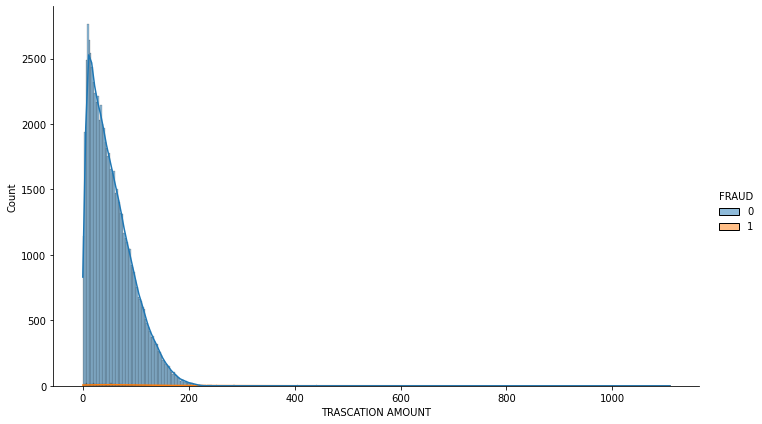

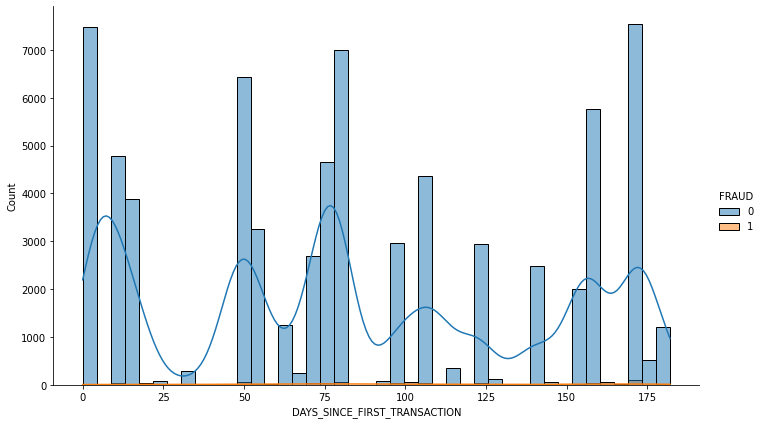

In [34]:
# identifying the distribution in the columns
features = ['TRANSACTION_ID','CUSTOMER_ID', 'TYPE of TRANSACTION','TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']
for f in features:
    sns.displot(x = df[f],kde=True,height=6,aspect=1.67, hue='FRAUD', data = df)
    plt.show()

In [35]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [36]:
df['month'] = df['DATETIME'].dt.month

In [37]:
df['date'] = df['DATETIME'].dt.date

In [38]:
df['year'] = df['DATETIME'].dt.year

In [39]:
df['quarter'] = df['DATETIME'].dt.quarter

In [40]:
df['dayofweek'] = df['DATETIME'].dt.dayofweek

In [41]:
df['weekday_name'] = df['DATETIME'].dt.day_name()

In [42]:
df['time'] = df['DATETIME'].dt.hour

In [43]:
df.month.unique()

array([9, 8, 6, 7, 4, 5], dtype=int64)

In [44]:
df.month.value_counts()

9    17271
4    16403
6    16003
5    10115
7     7891
8     5702
Name: month, dtype: int64

In [45]:
df['month'][df["FRAUD"] == 1].value_counts()

9    181
6    151
5     96
7     84
4     82
8     62
Name: month, dtype: int64

In [46]:
df.year.unique()

array([2018], dtype=int64)

In [47]:
df['dayofweek'].unique()

array([3, 2, 1, 6, 4, 5, 0], dtype=int64)

In [48]:
df['dayofweek'][df["FRAUD"] == 1].value_counts()

1    162
3    147
2    140
5     84
6     74
4     45
0      4
Name: dayofweek, dtype: int64

In [49]:
df['dayofweek'].value_counts()

3    18376
1    18340
2    13582
5     9088
6     8706
4     4728
0      565
Name: dayofweek, dtype: int64

In [50]:
df.quarter.unique()

array([3, 2], dtype=int64)

In [51]:
df['quarter'][df["FRAUD"] == 1].value_counts()

2    329
3    327
Name: quarter, dtype: int64

In [52]:
df['quarter'].value_counts()

2    42521
3    30864
Name: quarter, dtype: int64

In [53]:
df.head()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,month,date,year,quarter,dayofweek,weekday_name,time
0,0,1653444,2018-09-20 11:49:41,0,Hotels,88.11,172,0,9,2018-09-20,2018,3,3,Thursday,11
1,1,1657926,2018-09-20 20:21:57,0,Grocery,78.25,172,0,9,2018-09-20,2018,3,3,Thursday,20
2,2,1174679,2018-08-01 12:11:36,0,Airways,62.28,122,0,8,2018-08-01,2018,3,2,Wednesday,12
3,3,1175894,2018-08-01 13:58:40,0,Airways,80.16,122,0,8,2018-08-01,2018,3,2,Wednesday,13
4,4,758479,2018-06-19 04:18:11,0,Insulation,90.07,79,0,6,2018-06-19,2018,2,1,Tuesday,4


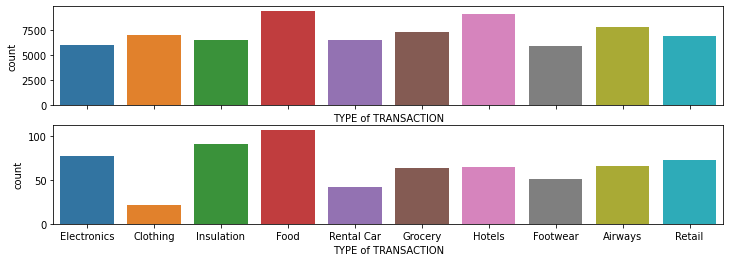

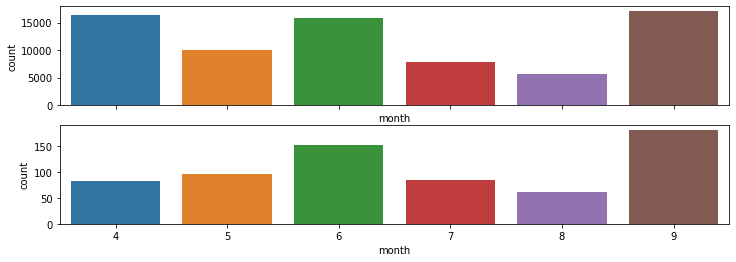

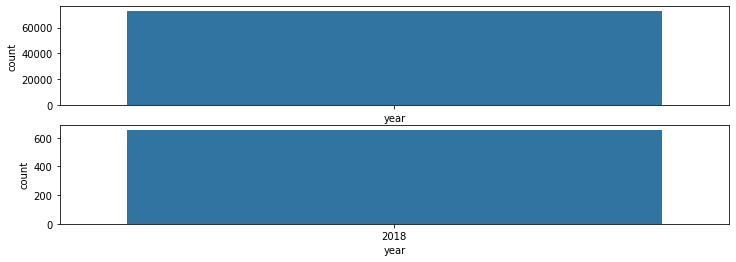

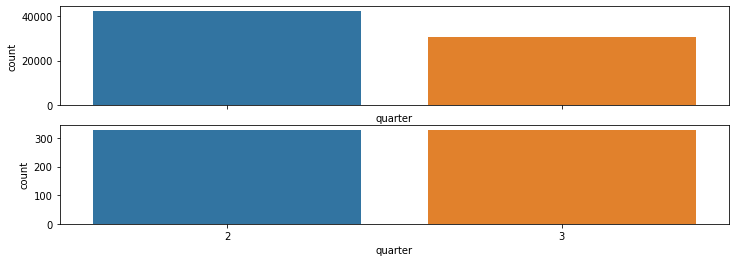

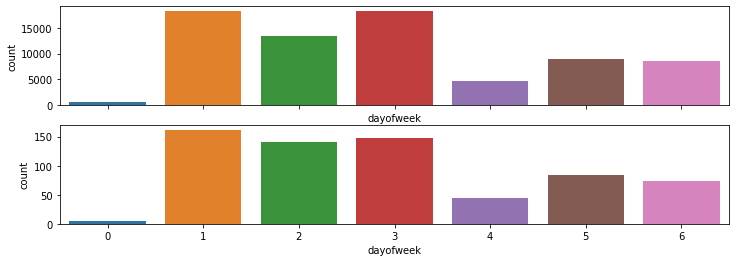

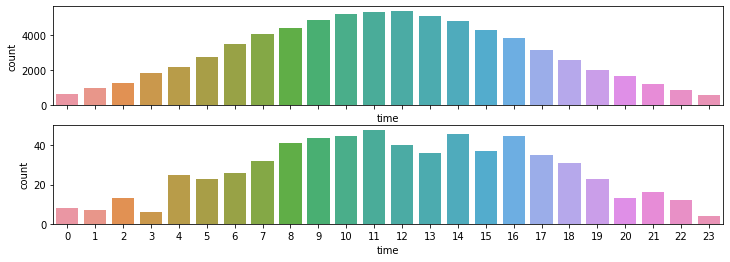

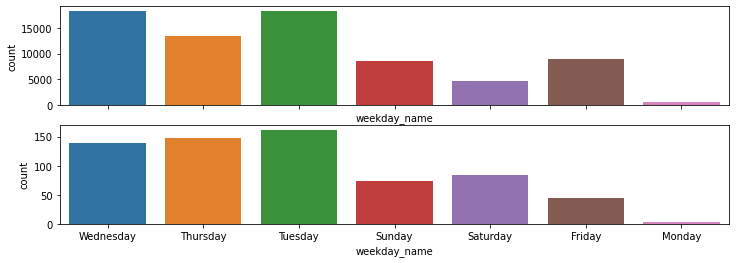

In [54]:
features = ["TYPE of TRANSACTION", "month", "year","quarter","dayofweek","time","weekday_name"]
for f in features:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

    sns.countplot(x=df[f][df["FRAUD"] == 0], data=df, ax=ax1)


    sns.countplot(x=df[f][df["FRAUD"] == 1], data=df, ax=ax2)
